In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
genres = pd.read_csv('genres_v2.csv')

C:\Users\shash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns',None)
genres.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo            type  \
0          0.013400    0.0556   0.3890  156.985  audio_features   
1          0.000000    0.1180   0.1240  115.080  audio_features   
2          0.000004    0.3720   0.0391  218.050  audio_features   
3          0.000000    0.1140   0.1750  186.948  audio_features   
4          0.000000    0.1660   0.5910  147.988  audio_features   

                       id                                   uri  \
0  2Vc6NJ9PW9gD9q343XFRKx  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  7pgJBLVz5VmnL7uGHmRj6p  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  0vSWgAlfpye0WCGeNmuNhy  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  0VSXnJqQkwuH2ei1nOQ1nu  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  4jCeguq9rMTlbMmPHuO7S3  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...       224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...        98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...       123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...       123298   

   time_signature      genre                                      song_name  \
0               4  Dark Trap                            Mercury: Retrograde   
1               4  Dark Trap                                      Pathology   
2               4  Dark Trap                                       Symbiote   
3               3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4               4  Dark Trap                                          Venom   

   Unnamed: 0 title  
0         NaN   NaN  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN

In [4]:
genres.shape

(42305, 22)

In [5]:
genres.time_signature.value_counts()

4    40427
3     1219
5      509
1      150
Name: time_signature, dtype: int64

In [6]:
genres.type.value_counts()

audio_features    42305
Name: type, dtype: int64

In [7]:
genres.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [8]:
songs_cleaned = genres.drop(['type','id','uri','track_href','analysis_url','song_name','Unnamed: 0','title'], axis=1)

In [9]:
songs_cleaned.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.013400    0.0556   0.3890  156.985       124539               4   
1          0.000000    0.1180   0.1240  115.080       224427               4   
2          0.000004    0.3720   0.0391  218.050        98821               4   
3          0.000000    0.1140   0.1750  186.948       123661               3   
4          0.000000    0.1660   0.5910  147.988       123298               4   

       genre  
0  Dark Trap  
1  Dark Trap  
2  Dark Trap  
3  Dark Trap  
4  Dark Trap

### Feature Engineering

In [10]:
cat_feat = [i for i in songs_cleaned.columns if songs_cleaned[i].dtype=='O']

In [11]:
cat_feat

['genre']

In [12]:
songs_cleaned.genre.value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [13]:
cat_num_feat = [i for i in songs_cleaned.columns if songs_cleaned[i].dtype!='O' and len(songs_cleaned[i].value_counts())<25]

In [14]:
num_feat = [i for i in songs_cleaned.columns if i not in cat_feat+cat_num_feat]

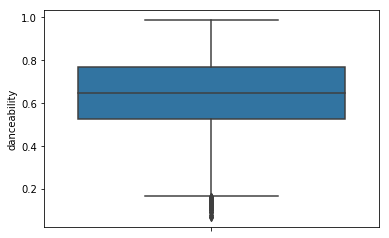

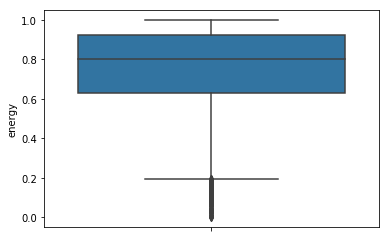

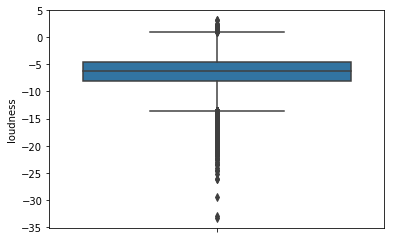

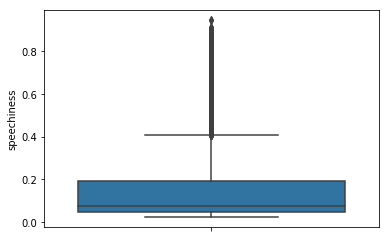

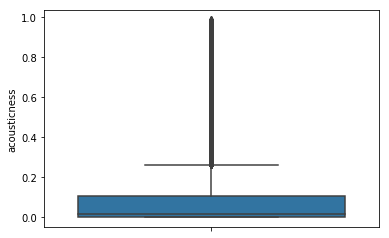

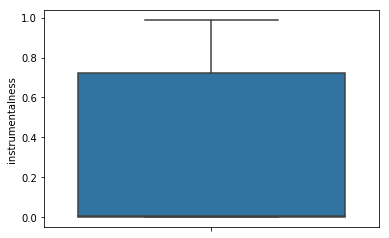

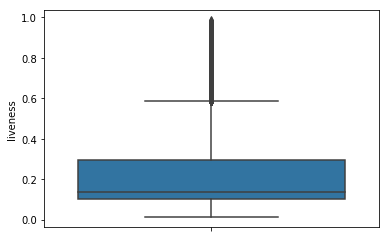

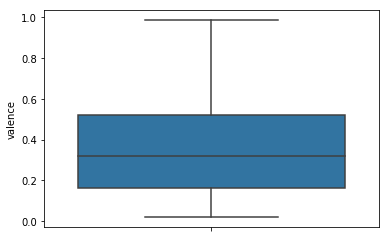

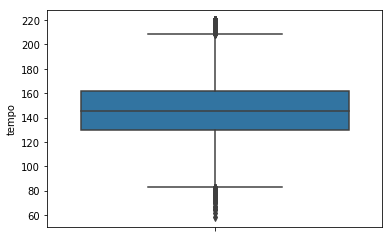

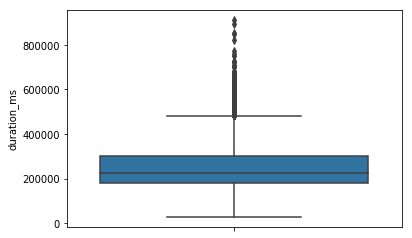

In [13]:
for i in num_feat:
    sns.boxplot(y=songs_cleaned[i])
    plt.show()

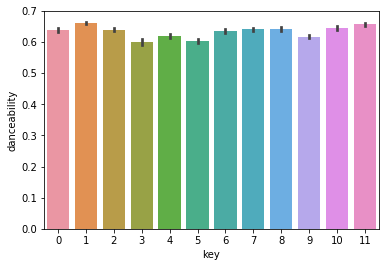

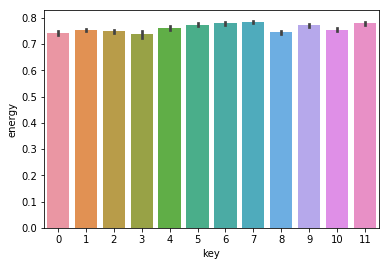

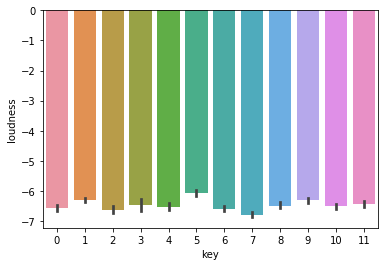

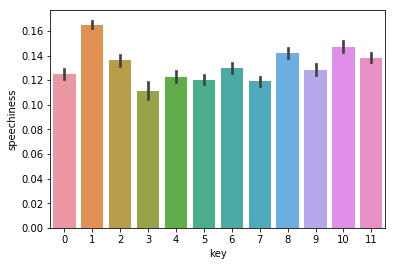

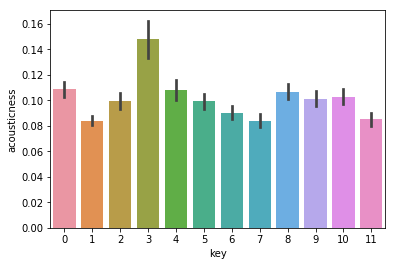

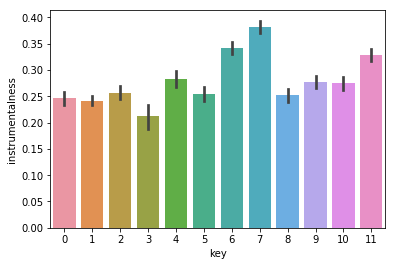

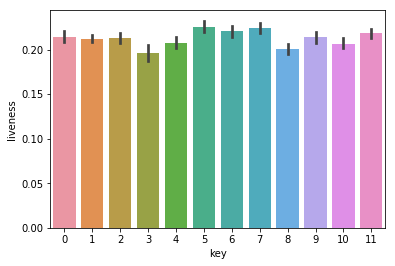

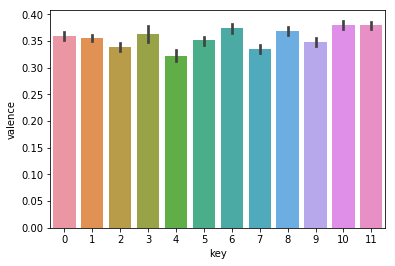

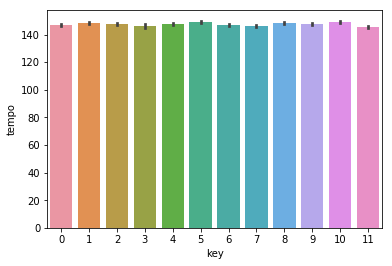

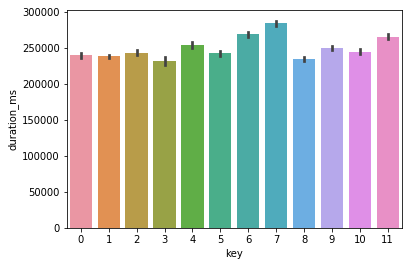

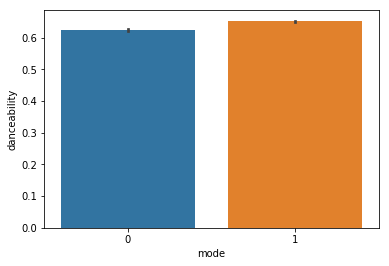

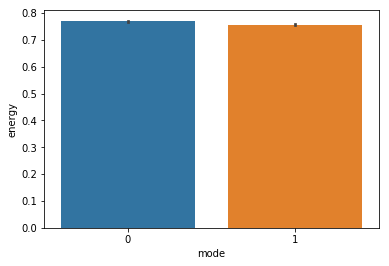

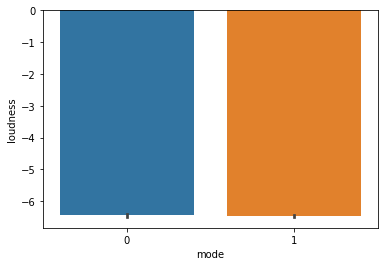

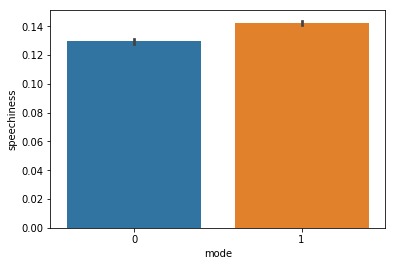

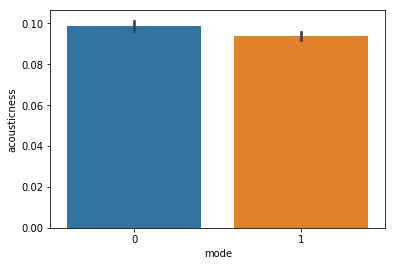

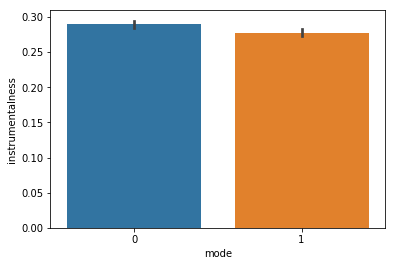

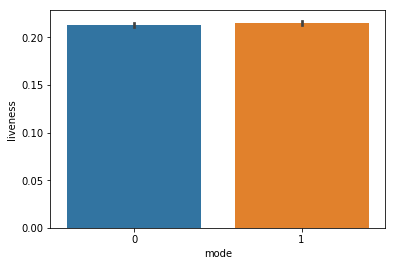

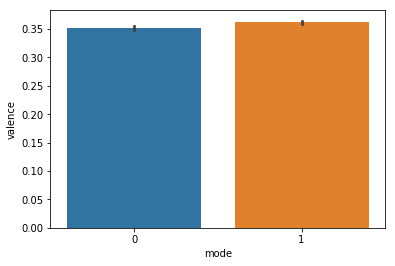

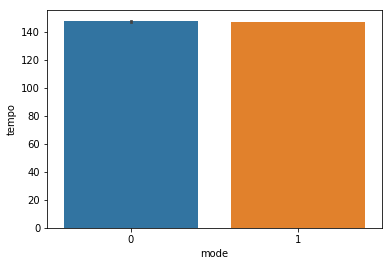

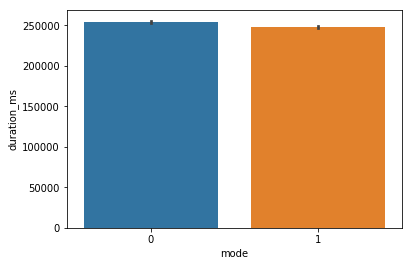

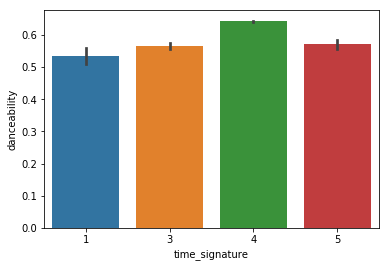

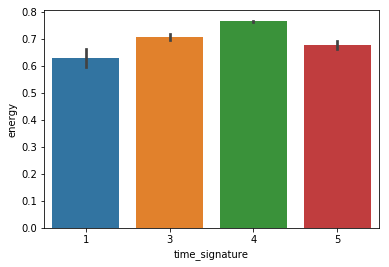

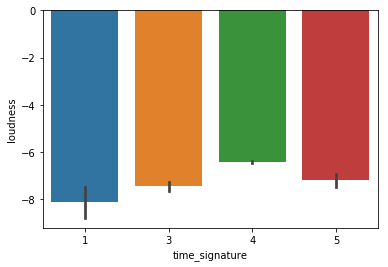

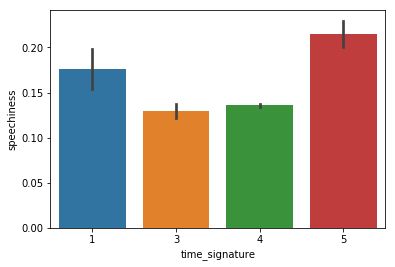

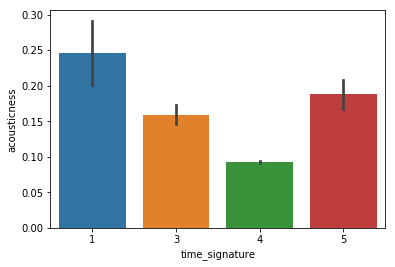

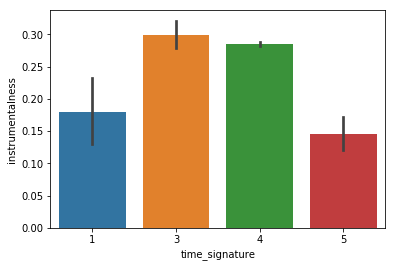

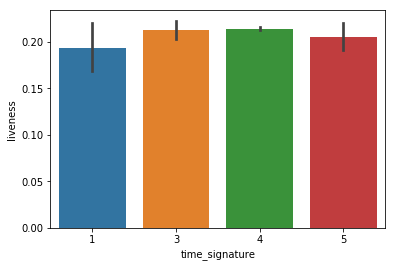

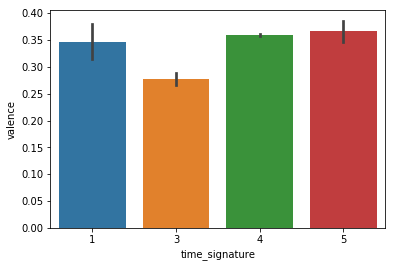

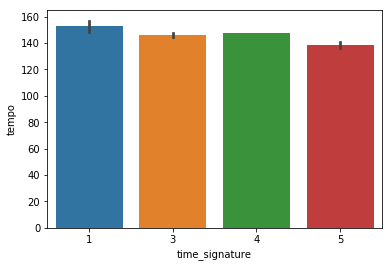

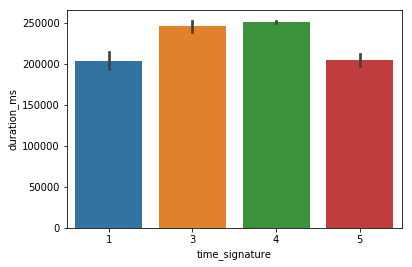

In [14]:
for i in cat_num_feat:
    for j in num_feat:
        sns.barplot(data=songs_cleaned, x=i, y=j)
        plt.show()

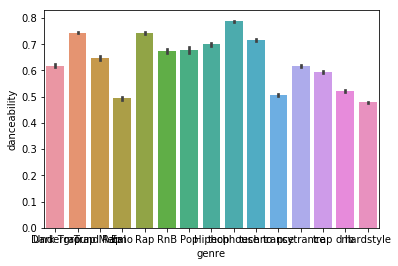

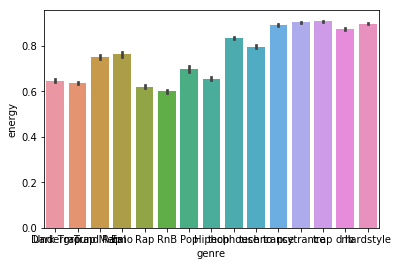

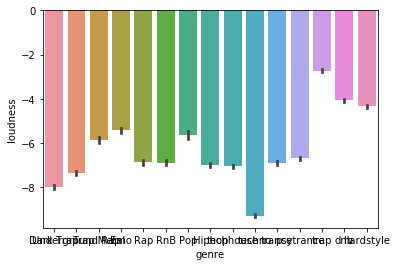

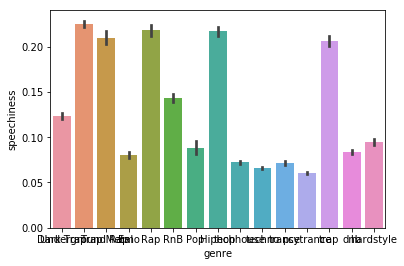

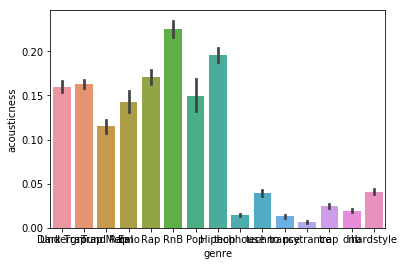

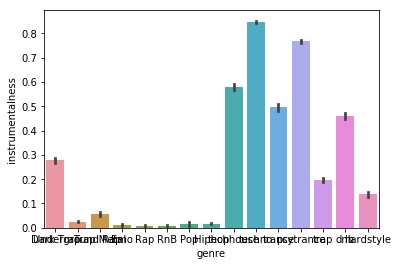

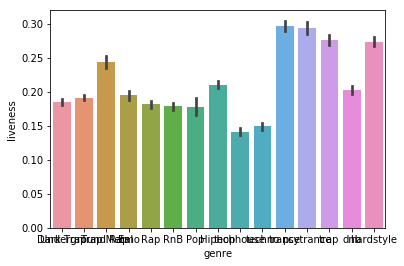

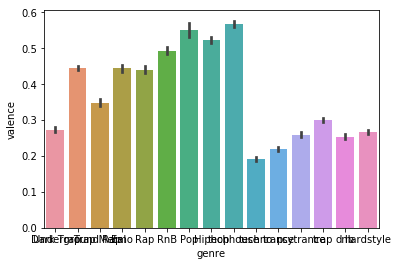

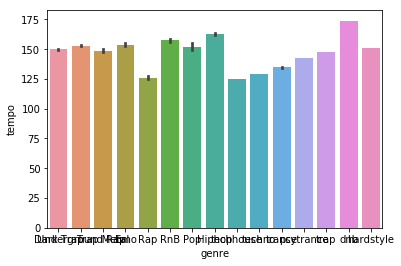

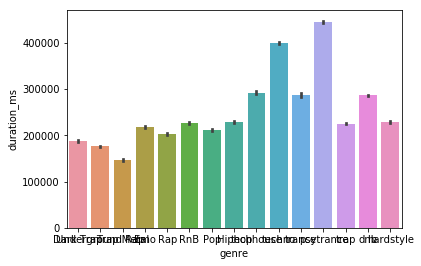

In [15]:
for i in cat_feat:
    for j in num_feat:
        sns.barplot(data=songs_cleaned, x=i, y=j)
        plt.show()

In [15]:
songs_cleaned_data = songs_cleaned.copy(deep=True)
for i in cat_num_feat:
    if len(songs_cleaned_data[i].value_counts()) > 10:
        #Frequency Replacement
        songs_cleaned_data[i].replace(dict(songs_cleaned_data[i].value_counts()), inplace=True)
    else:
        #one hot encoding
        columns = [i+' '+str(j) for j in pd.get_dummies(songs_cleaned_data[i], drop_first=True).columns]
        songs_cleaned_data[columns] = pd.get_dummies(songs_cleaned_data[i], drop_first=True)
        songs_cleaned_data.drop(i, axis=1,inplace=True)

In [16]:
songs_cleaned_data.head()

danceability  energy   key  loudness  speechiness  acousticness  \
0         0.831   0.814  3047    -7.364       0.4200        0.0598   
1         0.719   0.493  3345    -7.230       0.0794        0.4010   
2         0.850   0.893  2994    -4.783       0.0623        0.0138   
3         0.476   0.781  3470    -4.710       0.1030        0.0237   
4         0.798   0.624  3047    -7.668       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms      genre  \
0          0.013400    0.0556   0.3890  156.985       124539  Dark Trap   
1          0.000000    0.1180   0.1240  115.080       224427  Dark Trap   
2          0.000004    0.3720   0.0391  218.050        98821  Dark Trap   
3          0.000000    0.1140   0.1750  186.948       123661  Dark Trap   
4          0.000000    0.1660   0.5910  147.988       123298  Dark Trap   

   mode 1  time_signature 3  time_signature 4  time_signature 5  
0       1                 0                 1                 0  
1       1                 0                 1                 0  
2       1                 0                 1                 0  
3       1                 1                 0                 0  
4       1                 0                 1                 0

In [16]:
dict(songs_cleaned['key'].value_counts())

{1: 7537,
 7: 4275,
 11: 4150,
 6: 3714,
 0: 3470,
 8: 3345,
 9: 3254,
 10: 3251,
 2: 3047,
 5: 2994,
 4: 2368,
 3: 900}

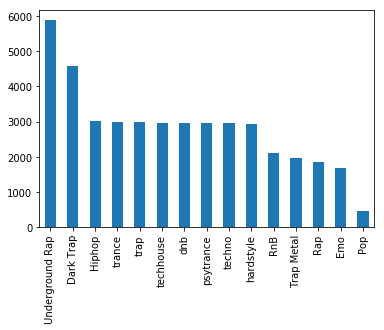

In [17]:
songs_cleaned.genre.value_counts().plot.bar()

In [18]:
songs_cleaned_data.genre = songs_cleaned_data.genre.map(dict(zip(songs_cleaned_data.genre.unique(),[i for i in range(0,15)])))

In [46]:
dict(zip(genres.genre.unique(),[i for i in range(0,15)]))

{'Dark Trap': 0,
 'Underground Rap': 1,
 'Trap Metal': 2,
 'Emo': 3,
 'Rap': 4,
 'RnB': 5,
 'Pop': 6,
 'Hiphop': 7,
 'techhouse': 8,
 'techno': 9,
 'trance': 10,
 'psytrance': 11,
 'trap': 12,
 'dnb': 13,
 'hardstyle': 14}

In [19]:
songs_cleaned_data.genre

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
42275    14
42276    14
42277    14
42278    14
42279    14
42280    14
42281    14
42282    14
42283    14
42284    14
42285    14
42286    14
42287    14
42288    14
42289    14
42290    14
42291    14
42292    14
42293    14
42294    14
42295    14
42296    14
42297    14
42298    14
42299    14
42300    14
42301    14
42302    14
42303    14
42304    14
Name: genre, Length: 42305, dtype: int64

In [20]:
songs_cleaned_data.head()

danceability  energy   key  loudness  speechiness  acousticness  \
0         0.831   0.814  3047    -7.364       0.4200        0.0598   
1         0.719   0.493  3345    -7.230       0.0794        0.4010   
2         0.850   0.893  2994    -4.783       0.0623        0.0138   
3         0.476   0.781  3470    -4.710       0.1030        0.0237   
4         0.798   0.624  3047    -7.668       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  genre  mode 1  \
0          0.013400    0.0556   0.3890  156.985       124539      0       1   
1          0.000000    0.1180   0.1240  115.080       224427      0       1   
2          0.000004    0.3720   0.0391  218.050        98821      0       1   
3          0.000000    0.1140   0.1750  186.948       123661      0       1   
4          0.000000    0.1660   0.5910  147.988       123298      0       1   

   time_signature 3  time_signature 4  time_signature 5  
0                 0                 1                 0  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 0                 1                 0

### Multivariate analysis

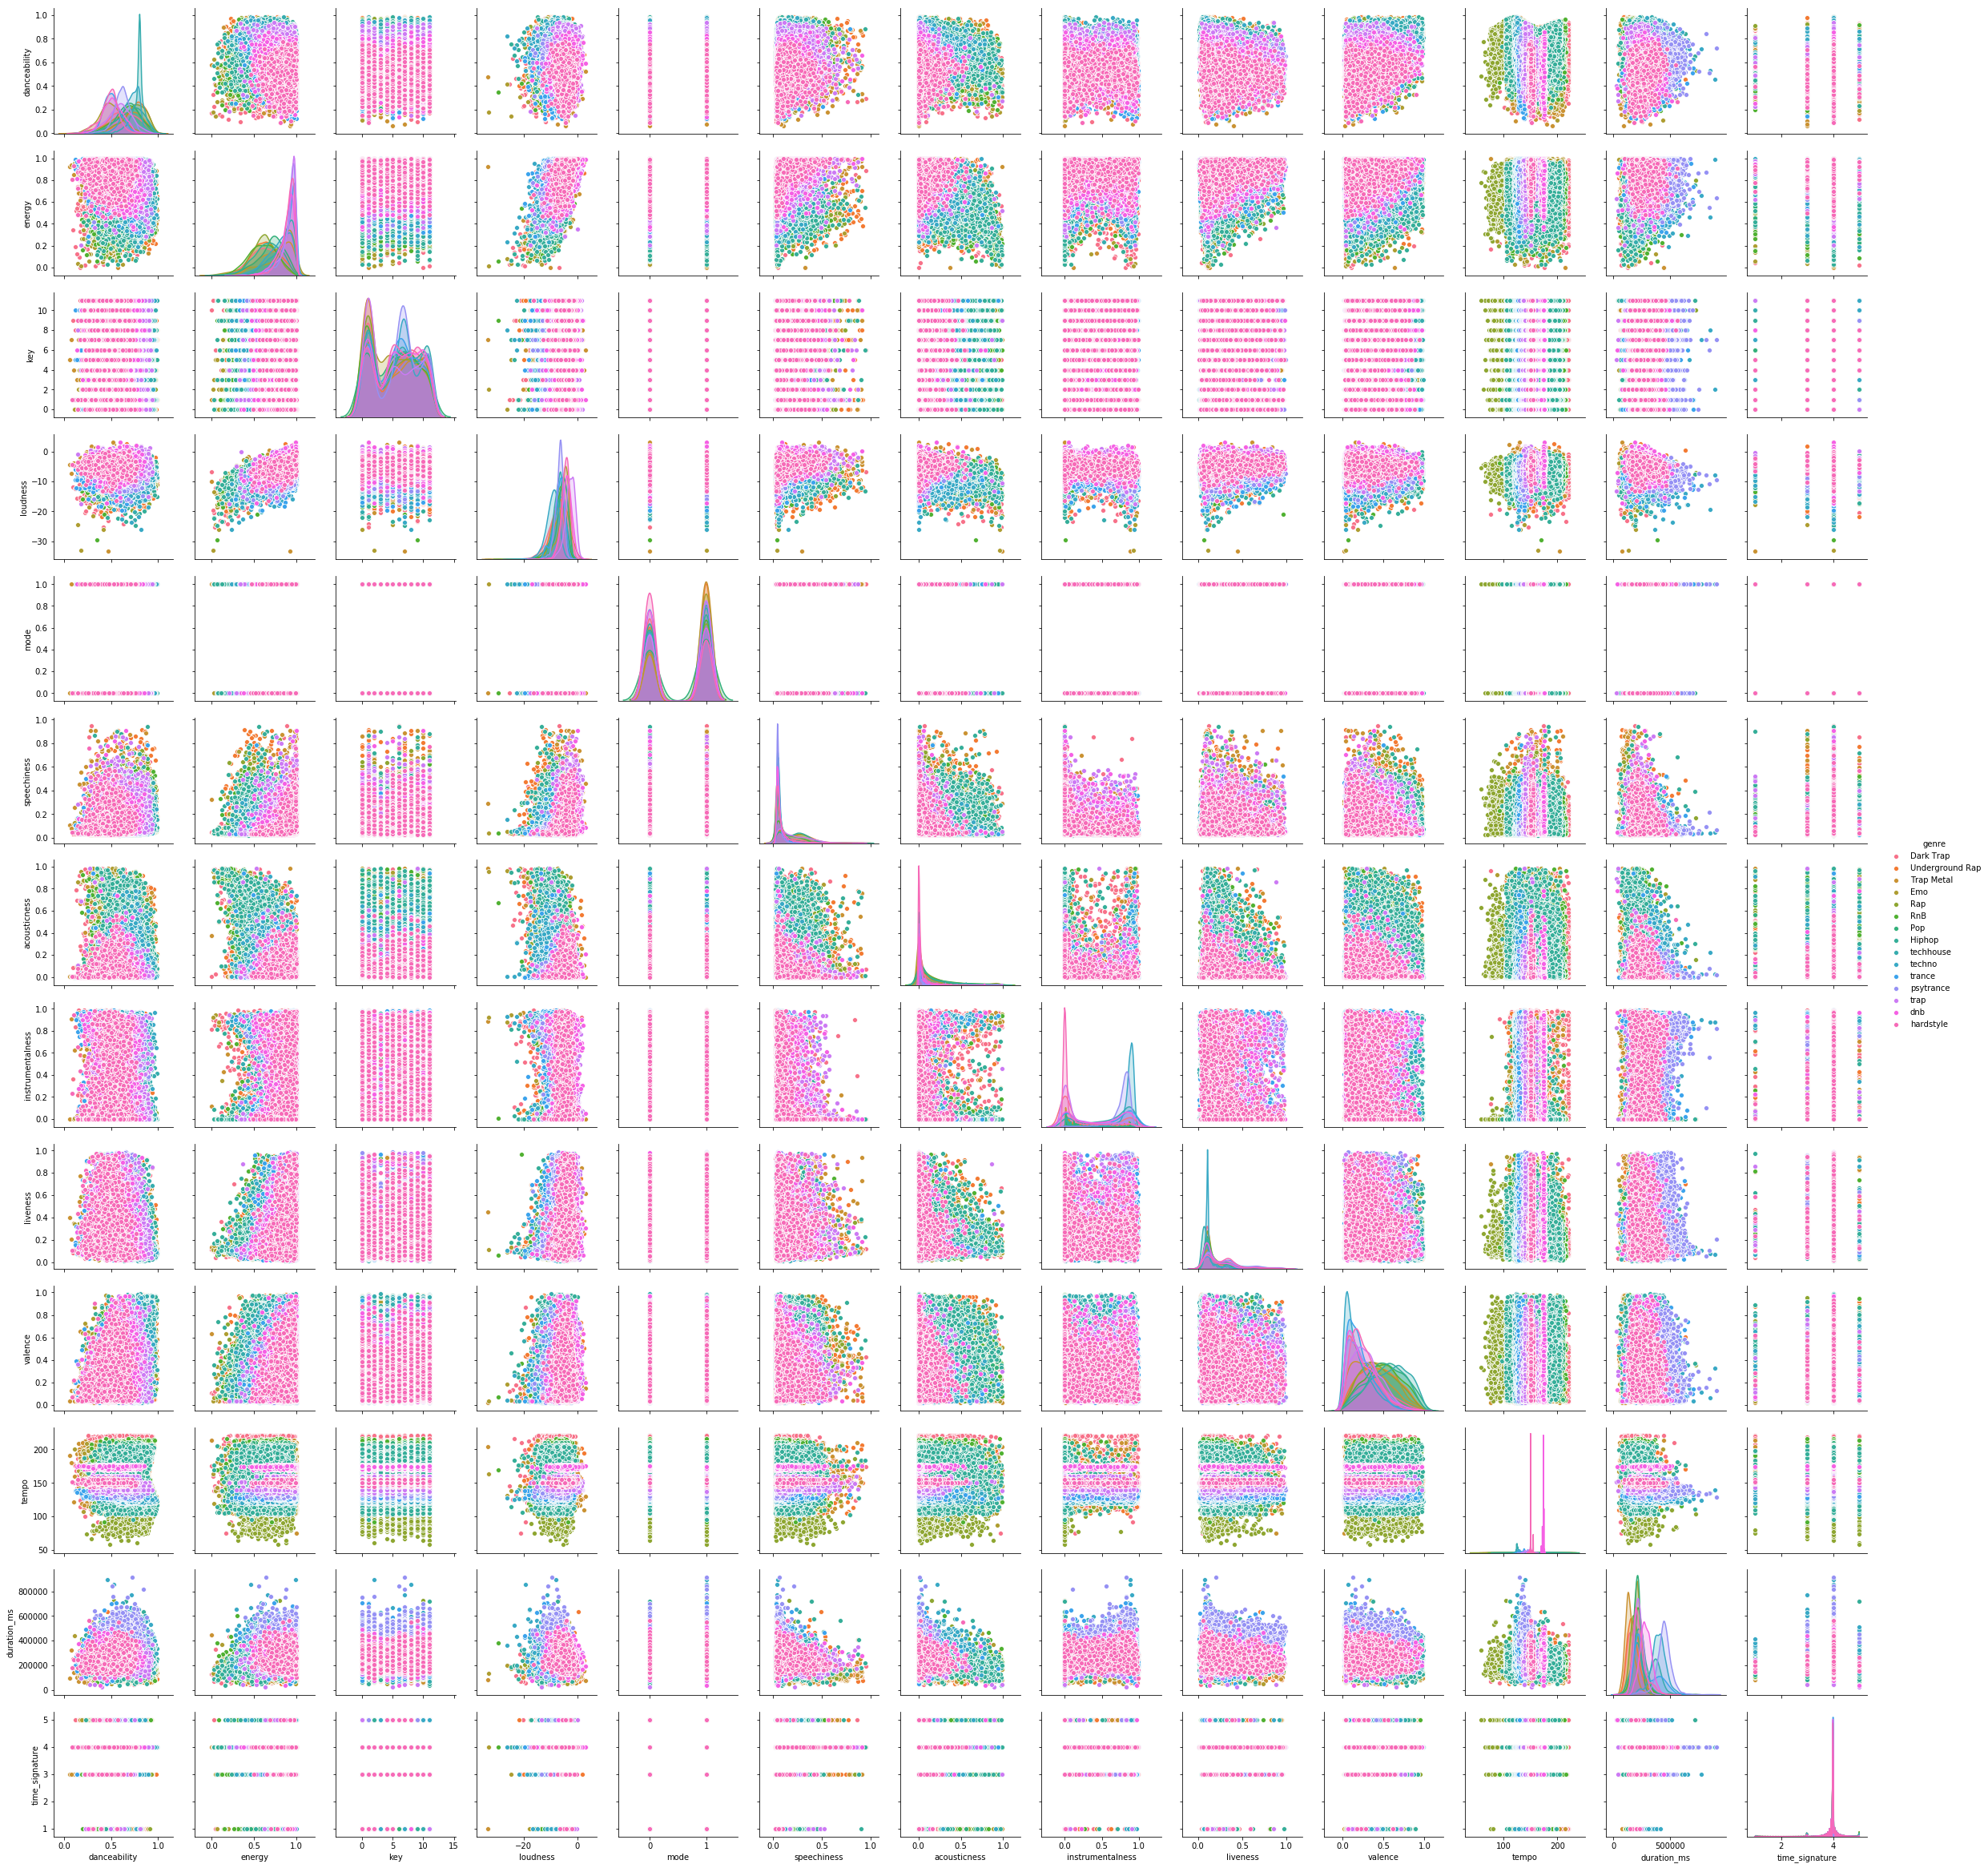

In [140]:
#sns.pairplot(data=songs_cleaned,hue='genre')

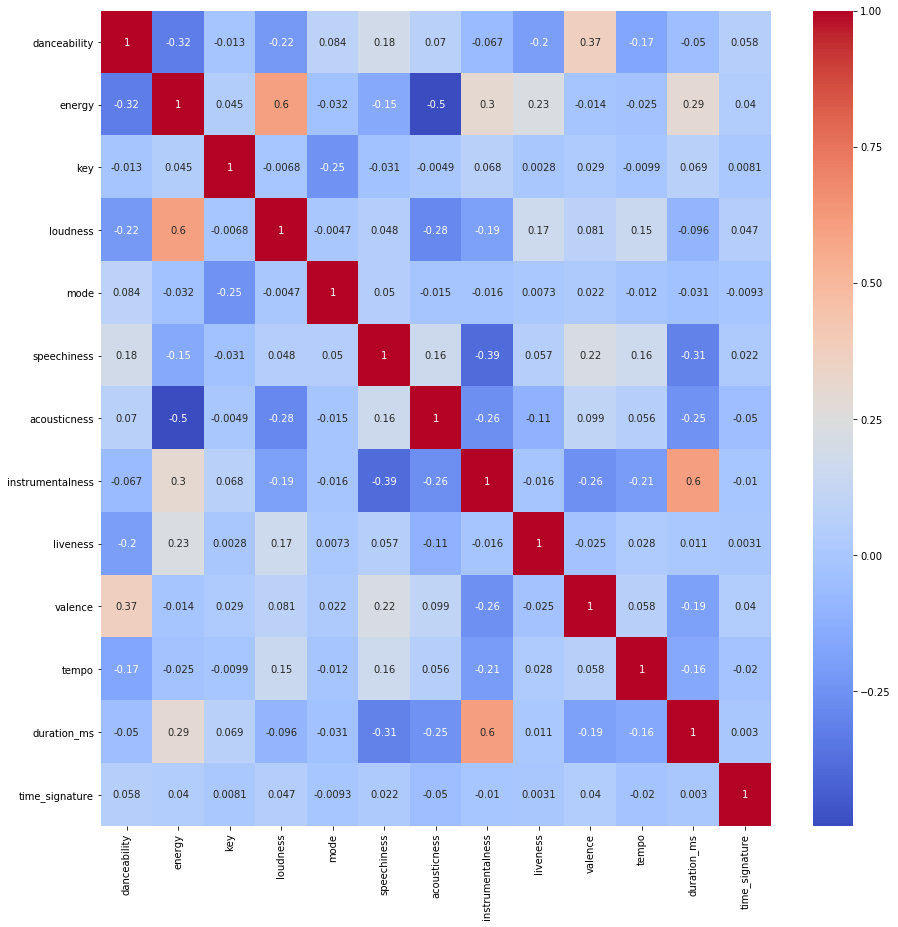

In [143]:
# plt.figure(figsize=(15,15))
# sns.heatmap(songs_cleaned.corr(), annot=True, cmap='coolwarm')

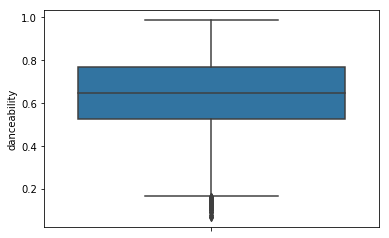

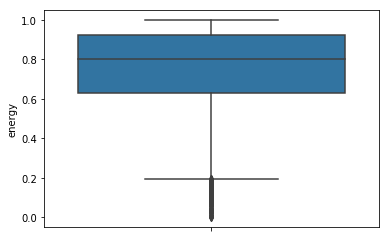

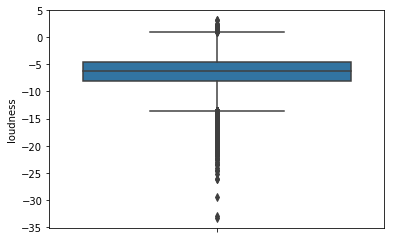

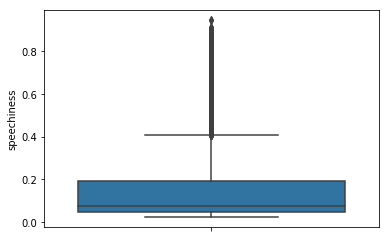

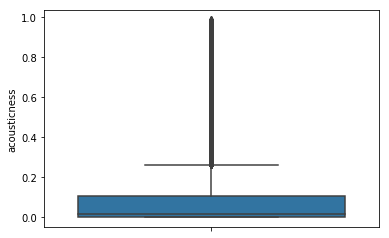

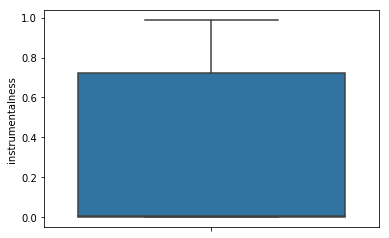

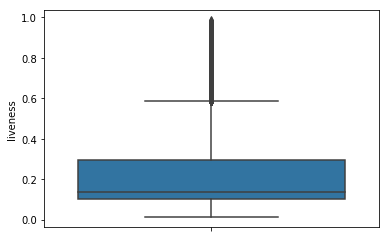

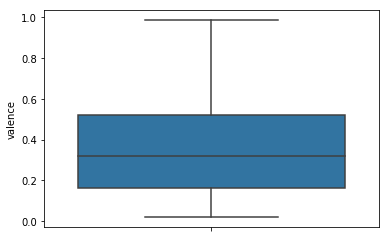

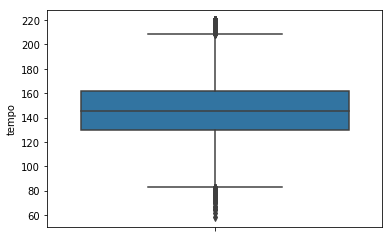

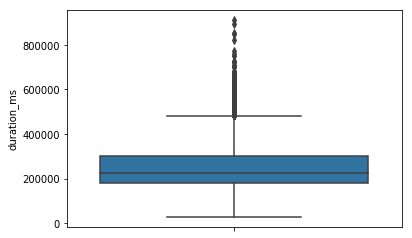

In [23]:
for i in num_feat:
    sns.boxplot(y=songs_cleaned_data[i])
    plt.show()

In [21]:
# Handling Outliers
data_no_outliers = songs_cleaned_data.copy(deep=True)
for i in num_feat:
    print(i)
    IQR=data_no_outliers[i].quantile(0.75)-data_no_outliers[i].quantile(0.25)
    lower_bridge=data_no_outliers[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=data_no_outliers[i].quantile(0.75)+(IQR*1.5)
    data_no_outliers.loc[data_no_outliers[i]>=upper_bridge,i]=upper_bridge
    data_no_outliers.loc[data_no_outliers[i]<=lower_bridge,i]=lower_bridge

danceability
energy
loudness
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_ms


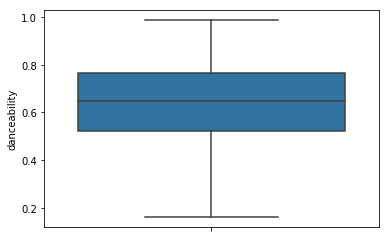

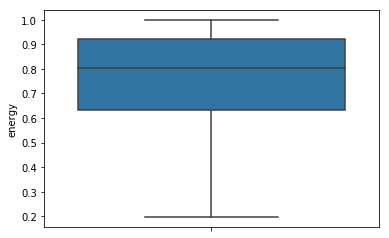

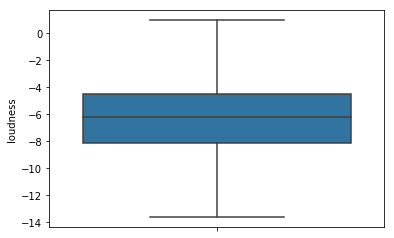

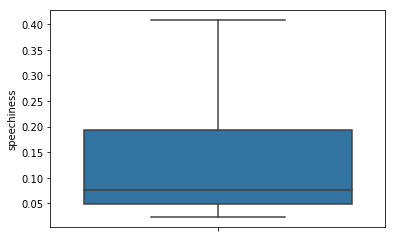

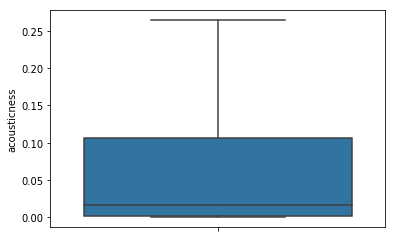

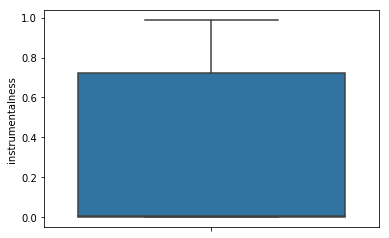

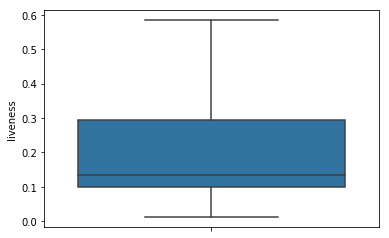

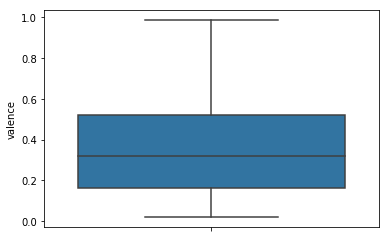

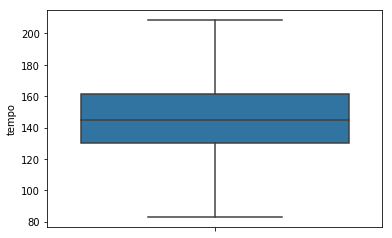

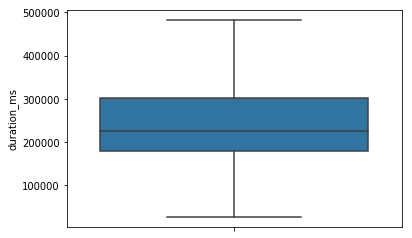

In [22]:
for i in num_feat:
    sns.boxplot(y=data_no_outliers[i])
    plt.show()

In [23]:
X = [i for i in data_no_outliers.columns if i not in cat_feat]
y = cat_feat

In [24]:
data_hyper_param = data_no_outliers.sample(n=1500, weights='genre').reset_index(drop=True)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_no_outliers[X],data_no_outliers[y], test_size=0.3, random_state=0,stratify=data_no_outliers[y])

In [26]:
X_test.shape

(12692, 15)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
import optuna
from sklearn.model_selection import cross_val_score

In [29]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',100,1000)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    learning_rate = trial.suggest_float('learning_rate',1e-7,1e-1, log=True)
    verbose = trial.suggest_int('verbose',1,5)
    max_features = trial.suggest_int('max_features',1,5)
    
    model = GradientBoostingClassifier(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      learning_rate=learning_rate,
                                      verbose=verbose,
                                      max_features=max_features)
    return cross_val_score(model, data_hyper_param[X], data_hyper_param[y], n_jobs=-1, cv=5).mean()

In [109]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-01-15 20:48:44,181] A new study created in memory with name: no-name-343da9e1-3147-4fa4-8c0d-0c09dcbd303b
[I 2021-01-15 20:49:10,405] Trial 0 finished with value: 0.806536136609971 and parameters: {'n_estimators': 928, 'max_depth': 8.517905589878529, 'learning_rate': 0.02603549432412436, 'verbose': 1, 'max_features': 4}. Best is trial 0 with value: 0.806536136609971.
[I 2021-01-15 20:49:20,071] Trial 1 finished with value: 0.7945798967037809 and parameters: {'n_estimators': 122, 'max_depth': 20.54001393510454, 'learning_rate': 0.009110002075473893, 'verbose': 2, 'max_features': 3}. Best is trial 0 with value: 0.806536136609971.
[I 2021-01-15 20:49:37,621] Trial 2 finished with value: 0.19751109520887014 and parameters: {'n_estimators': 642, 'max_depth': 2.791858117771222, 'learning_rate': 4.471244180591632e-06, 'verbose': 3, 'max_features': 5}. Best is trial 0 with value: 0.806536136609971.
[I 2021-01-15 20:49:59,730] Trial 3 finished with value: 0.7232189351688314 and paramete

[I 2021-01-15 21:00:14,345] Trial 29 finished with value: 0.7838656879732958 and parameters: {'n_estimators': 610, 'max_depth': 1.8371372411226539, 'learning_rate': 0.02764476445828368, 'verbose': 5, 'max_features': 2}. Best is trial 28 with value: 0.8132729186311757.
[I 2021-01-15 21:00:29,925] Trial 30 finished with value: 0.8100464065464956 and parameters: {'n_estimators': 997, 'max_depth': 3.409701986822174, 'learning_rate': 0.02060653503520851, 'verbose': 5, 'max_features': 2}. Best is trial 28 with value: 0.8132729186311757.
[I 2021-01-15 21:00:42,107] Trial 31 finished with value: 0.8100091781253138 and parameters: {'n_estimators': 780, 'max_depth': 3.6465804531637005, 'learning_rate': 0.01720730449462541, 'verbose': 5, 'max_features': 2}. Best is trial 28 with value: 0.8132729186311757.
[I 2021-01-15 21:00:57,385] Trial 32 finished with value: 0.8053903931364982 and parameters: {'n_estimators': 987, 'max_depth': 3.9841967691982734, 'learning_rate': 0.01571596811723487, 'verbose

[I 2021-01-15 21:06:41,878] Trial 59 finished with value: 0.7978845526989234 and parameters: {'n_estimators': 178, 'max_depth': 4.2192427021617265, 'learning_rate': 0.0017433323286259262, 'verbose': 5, 'max_features': 5}. Best is trial 58 with value: 0.8145694820766188.
[I 2021-01-15 21:06:51,164] Trial 60 finished with value: 0.8013210480521108 and parameters: {'n_estimators': 508, 'max_depth': 3.1041407048759098, 'learning_rate': 0.0060603455574087745, 'verbose': 5, 'max_features': 5}. Best is trial 58 with value: 0.8145694820766188.
[I 2021-01-15 21:06:59,369] Trial 61 finished with value: 0.8133020501285972 and parameters: {'n_estimators': 450, 'max_depth': 3.5842623296279266, 'learning_rate': 0.011451137153290077, 'verbose': 5, 'max_features': 5}. Best is trial 58 with value: 0.8145694820766188.
[I 2021-01-15 21:07:05,881] Trial 62 finished with value: 0.8079126560484706 and parameters: {'n_estimators': 456, 'max_depth': 2.878231985638688, 'learning_rate': 0.012187933749539165, 'v

[I 2021-01-15 21:10:34,030] Trial 89 finished with value: 0.8092452109475715 and parameters: {'n_estimators': 347, 'max_depth': 6.3378959714863115, 'learning_rate': 0.07069309076128753, 'verbose': 4, 'max_features': 5}. Best is trial 82 with value: 0.8145805013760297.
[I 2021-01-15 21:10:41,078] Trial 90 finished with value: 0.8059836077109276 and parameters: {'n_estimators': 335, 'max_depth': 4.494737094754251, 'learning_rate': 0.041304851909166565, 'verbose': 5, 'max_features': 4}. Best is trial 82 with value: 0.8145805013760297.
[I 2021-01-15 21:10:47,964] Trial 91 finished with value: 0.8131723480397703 and parameters: {'n_estimators': 376, 'max_depth': 3.3474373545546783, 'learning_rate': 0.023133442494367867, 'verbose': 5, 'max_features': 5}. Best is trial 82 with value: 0.8145805013760297.
[I 2021-01-15 21:10:54,845] Trial 92 finished with value: 0.8186032444954744 and parameters: {'n_estimators': 381, 'max_depth': 3.432270694299033, 'learning_rate': 0.022560021966666507, 'verbo

In [110]:
study.best_trial

FrozenTrial(number=92, values=[0.8186032444954744], datetime_start=datetime.datetime(2021, 1, 15, 21, 10, 47, 966028), datetime_complete=datetime.datetime(2021, 1, 15, 21, 10, 54, 845029), params={'n_estimators': 381, 'max_depth': 3.432270694299033, 'learning_rate': 0.022560021966666507, 'verbose': 5, 'max_features': 5}, distributions={'n_estimators': IntUniformDistribution(high=1000, low=100, step=1), 'max_depth': LogUniformDistribution(high=32, low=1), 'learning_rate': LogUniformDistribution(high=0.1, low=1e-07), 'verbose': IntUniformDistribution(high=5, low=1, step=1), 'max_features': IntUniformDistribution(high=5, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=92, state=TrialState.COMPLETE, value=None)

In [113]:
study.best_trial.params

{'n_estimators': 381,
 'max_depth': 3.432270694299033,
 'learning_rate': 0.022560021966666507,
 'verbose': 5,
 'max_features': 5}

In [30]:
model = GradientBoostingClassifier(n_estimators=381,
                                  max_depth=3,
                                  learning_rate=0.022,
                                  verbose=5,
                                  max_features=5)
model.fit(X_train,y_train.genre)

      Iter       Train Loss   Remaining Time 
         1       77037.3783            2.15m
         2       74677.3420            2.17m
         3       72551.0058            2.16m
         4       70950.0313            2.17m
         5       69229.7759            2.18m
         6       67838.1403            2.18m
         7       66378.5003            2.19m
         8       65031.3681            2.18m
         9       63744.6315            2.18m
        10       62610.3098            2.18m
        11       61532.7112            2.17m
        12       60608.9623            2.17m
        13       59572.2631            2.17m
        14       58707.0842            2.17m
        15       57843.9598            2.16m
        16       57017.7152            2.15m
        17       56173.9278            2.14m
        18       55385.4720            2.14m
        19       54627.4862            2.13m
        20       53962.9234            2.13m
        21       53283.3470            2.12m
        2

       364       23716.4005            6.06s
       365       23704.7313            5.70s
       366       23693.2129            5.34s
       367       23681.8608            4.98s
       368       23668.8022            4.63s
       369       23657.0391            4.27s
       370       23644.5140            3.91s
       371       23631.3106            3.56s
       372       23619.8015            3.20s
       373       23607.0541            2.84s
       374       23594.6571            2.49s
       375       23582.2465            2.13s
       376       23571.4941            1.78s
       377       23560.6616            1.42s
       378       23548.9980            1.07s
       379       23536.9603            0.71s
       380       23524.9605            0.36s
       381       23513.8191            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.022, loss='deviance', max_depth=3,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=381,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=5, warm_start=False)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(X_test)
print(classification_report(pred, y_test.genre))
cm = confusion_matrix(np.array(pred), np.array(y_test.genre))

              precision    recall  f1-score   support

           0       0.47      0.55      0.51      1172
           1       0.67      0.45      0.54      2601
           2       0.29      0.51      0.37       331
           3       0.66      0.69      0.67       480
           4       0.31      0.81      0.44       208
           5       0.39      0.44      0.41       560
           6       0.12      0.44      0.18        36
           7       0.43      0.49      0.46       804
           8       0.91      0.87      0.89       937
           9       0.84      0.86      0.85       859
          10       0.87      0.79      0.82       991
          11       0.91      0.91      0.91       888
          12       0.85      0.82      0.83       929
          13       0.98      0.94      0.96       928
          14       0.92      0.83      0.87       968

   micro avg       0.69      0.69      0.69     12692
   macro avg       0.64      0.69      0.65     12692
weighted avg       0.72   

In [33]:
t = 0
for i in range(0,15):
    t += cm[i][i]

f = 0
for i in range(0,15):
    for j in range(0,15):
        if i!=j:
            f += cm[i][j]
t/(t+f)

0.6883075953356445

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(X_test)
print(classification_report(pred, y_test.genre))
cm = confusion_matrix(np.array(pred), np.array(y_test.genre))

              precision    recall  f1-score   support

           0       0.48      0.55      0.51      1192
           1       0.67      0.45      0.54      2612
           2       0.29      0.54      0.38       319
           3       0.66      0.69      0.68       484
           4       0.31      0.84      0.45       200
           5       0.38      0.44      0.41       549
           6       0.09      0.42      0.15        31
           7       0.44      0.49      0.47       811
           8       0.92      0.87      0.89       939
           9       0.83      0.86      0.85       860
          10       0.86      0.78      0.82       987
          11       0.92      0.90      0.91       903
          12       0.84      0.82      0.83       925
          13       0.98      0.95      0.96       920
          14       0.91      0.84      0.87       960

   micro avg       0.69      0.69      0.69     12692
   macro avg       0.64      0.70      0.65     12692
weighted avg       0.72   

In [34]:
t = 0
for i in range(0,15):
    t += cm[i][i]

f = 0
for i in range(0,15):
    for j in range(0,15):
        if i!=j:
            f += cm[i][j]
t/(t+f)

0.6883075953356445

In [44]:
import pickle
file = open('model.pkl','wb')
pickle.dump(model, file)

In [35]:
for i in num_feat:
    IQR=songs_cleaned_data[i].quantile(0.75)-songs_cleaned_data[i].quantile(0.25)
    lower_bridge=songs_cleaned_data[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=songs_cleaned_data[i].quantile(0.75)+(IQR*1.5)
    print(i, lower_bridge, upper_bridge)

danceability 0.1610000000000002 1.1289999999999998
energy 0.19550000000000012 1.3594999999999997
loudness -13.633 0.9589999999999996
speechiness -0.16674999999999998 0.40885
acousticness -0.156175 0.264905
instrumentalness -1.083 1.805
liveness -0.19199999999999998 0.5855999999999999
valence -0.38049999999999995 1.0635
tempo 82.63150000000003 208.76349999999996
duration_ms -2099.5 483072.5


In [43]:
songs_cleaned_data.tempo.max()

220.29